<a href="https://colab.research.google.com/github/isaac-debug/qunatitive-invest/blob/main/0050_TW_Srategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0050.TW Strategy

In [135]:
pip install yfinance --upgrade --no-cache-dir # https://pypi.org/project/yfinance/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## revenue of 0050

In [137]:
import yfinance as yf
stock = yf.Ticker("0050.TW")
data = stock.history(period="max")
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2008-01-02,60.009998,60.009998,60.009998,60.009998,0,0,0
2008-01-03,58.889999,58.889999,58.889999,58.889999,0,0,0
2008-01-04,59.009998,59.009998,59.009998,59.009998,0,0,0
2008-01-07,56.389999,56.389999,56.389999,56.389999,0,0,0
2008-01-08,56.980000,56.980000,56.980000,56.980000,0,0,0
...,...,...,...,...,...,...,...
2022-06-20,120.900002,120.949997,119.500000,119.750000,10564277,0,0
2022-06-21,120.949997,122.199997,120.349998,122.199997,6482625,0,0
2022-06-22,121.699997,121.699997,119.349998,119.500000,15108994,0,0


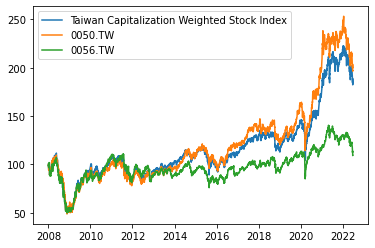

In [138]:
data['Adj Close'] = data['Close'] * 1.6666

stock = yf.Ticker("^TWII")
data2 = stock.history(period="max")
data2 = data2['2008-01-02':]
data2['Adj Close'] = data2['Close'] / 83.23

stock = yf.Ticker("0056.TW")
etf1 = stock.history(period="max")
etf1['Adj Close'] = etf1['Close'] * 3.89

plt.plot(data2['Adj Close'], label = 'Taiwan Capitalization Weighted Stock Index')
plt.plot(data['Adj Close'], label = '0050.TW')
plt.plot(etf1['Adj Close'], label = '0056.TW')


plt.legend()

plt.show()

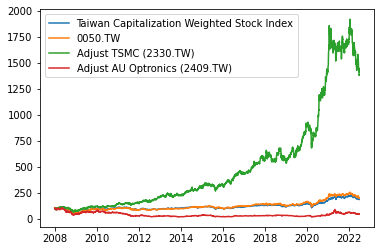

In [139]:
stock = yf.Ticker("2330.TW")
data4 = stock.history(period="max")
data4 = data4['2008-01-02':]
data4['Adj Close'] = data4['Close'] + data4['Dividends']
data4['Adj Close'] /= 35.28
data4['Adj Close'] *= 100

stock = yf.Ticker("2409.TW")
data5 = stock.history(period="max")
data5 = data5['2008-01-02':]
data5['Adj Close'] = data5['Close'] + data5['Dividends']
data5['Adj Close'] /= 37.58
data5['Adj Close'] *= 100

# data5[data5['Dividends'] != 0.0]
# data5['2008-07-30':'2009-08-4'].head(30)

# stock = yf.Ticker("2317.TW")
# data6 = stock.history(period="max")
# data6 = data6['2008-01-02':]
# data6['Adj Close'] = data6['Close'] + data['Dividends']
# data6['Adj Close'] /= 1.079

# data6[data6['Stock Splits'] != 0.0]

# stock = yf.Ticker("2881.TW")
# data7 = stock.history(period="max")
# data7 = data7['2008-01-02':]
# data7['Adj Close'] = data7['Close'] + data['Dividends']
# data7['Adj Close'] *= 4.597
# data7

plt.plot(data2['Adj Close'], label = 'Taiwan Capitalization Weighted Stock Index')
plt.plot(data['Adj Close'], label = '0050.TW')
plt.plot(data4['Adj Close'], label = 'Adjust TSMC (2330.TW)')
plt.plot(data5['Adj Close'], label = 'Adjust AU Optronics (2409.TW)')

plt.legend()

plt.show()


## 0050 Timing Strategy

### MA5 >= MA20


*   Buy： MA5 >= MA20
*   Sell： MA5 < MA20


In [150]:
# 0050 pick time
data = data[['Open', 'Close', 'Adj Close']]
data['Earning Rate'] = data['Close'].pct_change()
data['MA3'] = data['Close'].rolling(3).mean()
data['MA5'] = data['Close'].rolling(5).mean()
data['indicator'] = (data['MA3'] >= data['MA5'])
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,Open,Close,Adj Close,Earning Rate,MA3,MA5,indicator
Date,,,,,,,
2008-01-02,60.009998,60.009998,100.012663,NaN,NaN,NaN,False
2008-01-03,58.889999,58.889999,98.146073,-0.018664,NaN,NaN,False
2008-01-04,59.009998,59.009998,98.346063,0.002038,59.303332,NaN,False
2008-01-07,56.389999,56.389999,93.979573,-0.044399,58.096666,NaN,False
2008-01-08,56.980000,56.980000,94.962867,0.010463,57.459999,58.255999,False
...,...,...,...,...,...,...,...
2022-06-20,120.900002,119.750000,199.575350,-0.009102,121.033333,121.839999,False
2022-06-21,120.949997,122.199997,203.658515,0.020459,120.933332,121.609999,False
2022-06-22,121.699997,119.500000,199.158700,-0.022095,120.483332,120.959999,False


## Calculate Cumulative Earning



1.   Buy: Buy at tomorrow Open
2.   Sell: Sell at tomorrow Close



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Date
2008-01-02    100.000000
2008-01-03    100.000000
2008-01-04    100.000000
2008-01-07    100.000000
2008-01-08    100.000000
                 ...    
2022-06-20    224.534533
2022-06-21    224.534533
2022-06-22    224.534533
2022-06-23    224.534533
2022-06-24    224.534533
Name: cumulative earning, Length: 3560, dtype: float64


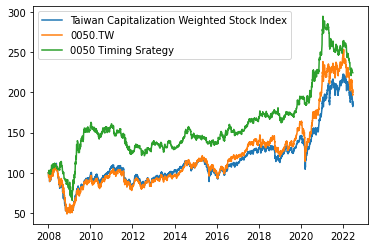

In [152]:
data['cumulative earning'] = 100

for i in range(1, len(data)):
  if data['indicator'].iloc[i-1] == False:
    # sell at today / calculate today's rearning
    if data['indicator'].iloc[i-2] == True:
      data['cumulative earning'].iloc[i] = data['cumulative earning'].iloc[i-1] * ( 1 + data['Earning Rate'].iloc[i])
    # keep empty / same cum earning
    else:
      data['cumulative earning'].iloc[i] = data['cumulative earning'].iloc[i-1]
  else:
    # buy at today open
    if data['indicator'].iloc[i-2] == False:
      data['cumulative earning'].iloc[i] = data['cumulative earning'].iloc[i-1] * (1 + (data['Close'].iloc[i] - data['Open'].iloc[i])/data['Open'].iloc[i])
    # hold
    else:
      data['cumulative earning'].iloc[i] = data['cumulative earning'].iloc[i-1] * ( 1 + data['Earning Rate'].iloc[i])

print(data['cumulative earning'])

plt.plot(data2['Adj Close'], label = 'Taiwan Capitalization Weighted Stock Index')
plt.plot(data['Adj Close'], label = '0050.TW')
plt.plot(data['cumulative earning'], label = '0050 Timing Srategy')

plt.legend()

plt.show()